# 05_Housing_Market_Analysis - Hauptanalyse
## Berliner Wohnungsmarkt - Umfassende Datenanalyse

### 🎯 **Projektübersicht**
Dieses Notebook führt die **Hauptanalyse** des Berliner Wohnungsmarktes durch und baut auf der **modularen Preprocessing-Pipeline** auf:

1. **01_Clean_Dataset_2018_2019.ipynb** ✅ 
2. **02_Clean_Dataset_2022.ipynb** ✅
3. **03_Clean_Dataset_2025.ipynb** ✅  
4. **04_Combine_Datasets.ipynb** ✅
5. **05_Housing_Market_Analysis.ipynb** ← **Dieses Notebook**

### 📊 **Input-Daten**
- **Kombiniertes Dataset:** `data/processed/berlin_housing_combined_enriched_final.csv`
- **Zeitspanne:** 2019, 2022, 2025 (7 Jahre Entwicklung)
- **Datenpunkte:** 17.487 Einträge
- **Bezirke:** 87 Berliner Bezirke/Ortsteile
- **🆕 PLZ-Enhancement:** 25.7% der Daten mit PLZ, Ortsteil und Koordinaten

### 🔍 **Analyseziele**
1. **Zeitreihenanalyse** der Mietpreisentwicklung (2019 → 2022 → 2025)
2. **Bezirks- und Ortsteilvergleiche** mit statistischen Tests
3. **🆕 PLZ-Level-Analysen** mit präziser Geolocation
4. **Explorative Datenanalyse** mit umfassenden Visualisierungen
5. **Preisvorhersagemodelle** mit Machine Learning
6. **🆕 Geospatiale Analysen** mit echten Koordinaten
7. **Handlungsempfehlungen** für Stakeholder

### 📋 **Erweiterte Datenstruktur**
```python
# Basis-Spalten aus der Pipeline:
base_columns = ['price', 'size', 'district', 'rooms', 'year', 'dataset_id', 'source']

# Neue PLZ-Enhancement-Spalten:
enhanced_columns = ['plz', 'ortsteil', 'bezirk', 'lat', 'lon', 'wol']
```

---
**Teil der modularen Berlin Housing Market Analysis**  
**Datum:** 4. Juli 2025  
**Version:** 2.0 (Angepasst an neue Pipeline)  
**Status:** ✅ Bereit für bereinigte Daten

## 1. Import Required Libraries
Importieren der erforderlichen Python-Bibliotheken für Datenverarbeitung, Analyse und Visualisierung.

In [12]:
# Datenmanipulation und -analyse
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisierung
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistik und Machine Learning
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Textverarbeitung und Regex
import re
from collections import Counter

# Datum und Zeit
from datetime import datetime

# Konfiguration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)
plt.style.use('seaborn-v0_8')

print("Alle Bibliotheken erfolgreich importiert!")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Verarbeitung gestartet am: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Alle Bibliotheken erfolgreich importiert!
Pandas Version: 2.3.0
NumPy Version: 2.3.1
Matplotlib Version: 3.10.3
Seaborn Version: 0.13.2
Verarbeitung gestartet am: 2025-07-06 15:03:55


## 2. Laden der standardisierten Daten
### 🎯 **Bereinigte und standardisierte Datensätze aus der Pipeline**

Die Datenbereinigung wurde bereits in den spezialisierten Clean-Notebooks durchgeführt:
- **Einheitliche Spaltenstruktur:** `price`, `size`, `district`, `rooms`, `year`, `dataset_id`, `source`
- **Harmonisierte Filter:** Preis 100€-10.000€, Größe 10m²-500m²
- **Qualitätsvalidierung:** Schema-Prüfung und Konsistenz-Tests durchgeführt

In [13]:
# Lade das finale kombinierte Dataset aus der Pipeline
print("=" * 80)
print("LADEN DES FINALEN KOMBINIERTEN DATASETS")
print("=" * 80)

# Lade das finale bereinigte und kombinierte Dataset mit PLZ-Enhancement
print("🎯 Kombiniertes finales Dataset mit PLZ-Enhancement aus der Pipeline:")
combined_df = pd.read_csv('data/processed/berlin_housing_combined_enriched_final.csv')

print(f"✅ Dataset geladen: {combined_df.shape[0]:,} Zeilen, {combined_df.shape[1]} Spalten")
print(f"📊 Verfügbare Spalten: {list(combined_df.columns)}")

# Grundlegende Informationen
print(f"\n=== DATASET-ÜBERSICHT ===")
print(f"Zeitspanne: {combined_df['year'].min()} - {combined_df['year'].max()}")
print(f"Anzahl Jahre: {combined_df['year'].nunique()}")
print(f"Verfügbare Jahre: {sorted(combined_df['year'].unique())}")

print(f"\nBezirke: {combined_df['district'].nunique()}")
print(f"Datenquellen: {combined_df['dataset_id'].nunique()}")
print(f"Quellen: {sorted(combined_df['dataset_id'].unique())}")

# Datenqualität prüfen
print(f"\n=== DATENQUALITÄT ===")
total_rows = len(combined_df)
print(f"Gesamtzeilen: {total_rows:,}")

# Prüfe Vollständigkeit der Standardspalten und PLZ-Enhancement-Spalten
standard_columns = ['price', 'size', 'district', 'year', 'dataset_id', 'source']
enhanced_columns = ['plz', 'ortsteil', 'bezirk', 'lat', 'lon', 'wol']

print("=== STANDARDSPALTEN ===")
for col in standard_columns:
    if col in combined_df.columns:
        non_null = combined_df[col].notna().sum()
        completeness = (non_null / total_rows) * 100
        print(f"  {col}: {non_null:,}/{total_rows:,} ({completeness:.1f}% vollständig)")
    else:
        print(f"  ❌ {col}: Spalte nicht gefunden!")

print("\n=== PLZ-ENHANCEMENT-SPALTEN ===")
for col in enhanced_columns:
    if col in combined_df.columns:
        non_null = combined_df[col].notna().sum()
        completeness = (non_null / total_rows) * 100
        print(f"  {col}: {non_null:,}/{total_rows:,} ({completeness:.1f}% vollständig)")
    else:
        print(f"  ⚠️  {col}: Spalte nicht gefunden (möglicherweise nicht verfügbar)")

# Preis- und Größenstatistiken
print(f"\n=== PREIS- UND GRÖSSENSTATISTIKEN ===")
if 'price' in combined_df.columns:
    print(f"Preis-Statistik:")
    print(f"  Min: {combined_df['price'].min():.2f}€")
    print(f"  Max: {combined_df['price'].max():.2f}€")
    print(f"  Median: {combined_df['price'].median():.2f}€")
    print(f"  Mittelwert: {combined_df['price'].mean():.2f}€")

if 'size' in combined_df.columns:
    print(f"Größen-Statistik:")
    print(f"  Min: {combined_df['size'].min():.1f}m²")
    print(f"  Max: {combined_df['size'].max():.1f}m²")
    print(f"  Median: {combined_df['size'].median():.1f}m²")
    print(f"  Mittelwert: {combined_df['size'].mean():.1f}m²")

# Verteilung nach Jahren
print(f"\n=== DATENVERTEILUNG NACH JAHREN ===")
if 'year' in combined_df.columns:
    year_distribution = combined_df['year'].value_counts().sort_index()
    for year, count in year_distribution.items():
        percentage = (count / total_rows) * 100
        print(f"  {year}: {count:,} Einträge ({percentage:.1f}%)")

# Verteilung nach Datenquellen
print(f"\n=== DATENVERTEILUNG NACH QUELLEN ===")
if 'dataset_id' in combined_df.columns:
    source_distribution = combined_df['dataset_id'].value_counts()
    for source, count in source_distribution.items():
        percentage = (count / total_rows) * 100
        print(f"  {source}: {count:,} Einträge ({percentage:.1f}%)")

print(f"\n✅ Dataset erfolgreich geladen und validiert!")
print(f"🚀 Bereit für Hauptanalyse mit {total_rows:,} bereinigten Datenpunkten")

LADEN DES FINALEN KOMBINIERTEN DATASETS
🎯 Kombiniertes finales Dataset mit PLZ-Enhancement aus der Pipeline:
✅ Dataset geladen: 17,487 Zeilen, 13 Spalten
📊 Verfügbare Spalten: ['price', 'size', 'district', 'rooms', 'year', 'dataset_id', 'source', 'wol', 'plz', 'ortsteil', 'bezirk', 'lat', 'lon']

=== DATASET-ÜBERSICHT ===
Zeitspanne: 2019 - 2025
Anzahl Jahre: 3
Verfügbare Jahre: [np.int64(2019), np.int64(2022), np.int64(2025)]

Bezirke: 87
Datenquellen: 3
Quellen: ['current', 'historical', 'recent']

=== DATENQUALITÄT ===
Gesamtzeilen: 17,487
=== STANDARDSPALTEN ===
  price: 17,487/17,487 (100.0% vollständig)
  size: 17,487/17,487 (100.0% vollständig)
  district: 17,487/17,487 (100.0% vollständig)
  year: 17,487/17,487 (100.0% vollständig)
  dataset_id: 17,487/17,487 (100.0% vollständig)
  source: 17,487/17,487 (100.0% vollständig)

=== PLZ-ENHANCEMENT-SPALTEN ===
  plz: 4,492/17,487 (25.7% vollständig)
  ortsteil: 4,490/17,487 (25.7% vollständig)
  bezirk: 4,490/17,487 (25.7% vollstän

### 🔍 **Datenstruktur-Validierung**
Prüfe die standardisierte Struktur und Konsistenz der Pipeline-Daten.

In [7]:
# Detaillierte Validierung der Pipeline-Daten
print("=" * 80)
print("PIPELINE-DATEN VALIDIERUNG UND STRUKTUR-ANALYSE")
print("=" * 80)

# Schema-Validierung
print(f"\n🔍 SCHEMA-VALIDIERUNG")
expected_columns = ['price', 'size', 'district', 'rooms', 'year', 'dataset_id', 'source']
actual_columns = list(combined_df.columns)

print(f"Erwartete Standardspalten: {expected_columns}")
print(f"Vorhandene Spalten: {actual_columns}")

# Prüfe ob alle Standardspalten vorhanden sind
missing_columns = set(expected_columns) - set(actual_columns)
extra_columns = set(actual_columns) - set(expected_columns)

if not missing_columns:
    print("✅ Alle Standardspalten vorhanden")
else:
    print(f"❌ Fehlende Spalten: {missing_columns}")

if extra_columns:
    print(f"📋 Zusätzliche Spalten: {extra_columns}")

# Datentyp-Validierung
print(f"\n📊 DATENTYP-VALIDIERUNG")
expected_dtypes = {
    'price': 'float64',
    'size': 'float64', 
    'district': 'object',
    'year': 'int64',
    'dataset_id': 'object',
    'source': 'object'
}

for col, expected_dtype in expected_dtypes.items():
    if col in combined_df.columns:
        actual_dtype = str(combined_df[col].dtype)
        if actual_dtype == expected_dtype or (expected_dtype == 'object' and actual_dtype in ['object', 'string']):
            print(f"  ✅ {col}: {actual_dtype}")
        else:
            print(f"  ⚠️ {col}: {actual_dtype} (erwartet: {expected_dtype})")

# Filter-Validierung (prüfe ob Pipeline-Filter korrekt angewendet wurden)
print(f"\n🎯 FILTER-VALIDIERUNG")
print("Prüfe ob Pipeline-Filter korrekt angewendet wurden:")

if 'price' in combined_df.columns:
    price_min, price_max = combined_df['price'].min(), combined_df['price'].max()
    print(f"  Preis-Filter: {price_min:.2f}€ - {price_max:.2f}€")
    if price_min >= 100 and price_max <= 10000:
        print("  ✅ Preis-Filter korrekt angewendet (100€ - 10.000€)")
    else:
        print("  ⚠️ Preis-Filter möglicherweise nicht korrekt angewendet")

if 'size' in combined_df.columns:
    size_min, size_max = combined_df['size'].min(), combined_df['size'].max()
    print(f"  Größen-Filter: {size_min:.1f}m² - {size_max:.1f}m²")
    if size_min >= 10 and size_max <= 500:
        print("  ✅ Größen-Filter korrekt angewendet (10m² - 500m²)")
    else:
        print("  ⚠️ Größen-Filter möglicherweise nicht korrekt angewendet")

# Bezirk-Validierung
print(f"\n🏘️ BEZIRK-VALIDIERUNG")
if 'district' in combined_df.columns:
    districts = combined_df['district'].value_counts()
    print(f"Anzahl eindeutiger Bezirke: {len(districts)}")
    print(f"Top 5 Bezirke:")
    for district, count in districts.head().items():
        print(f"  {district}: {count:,} Einträge")
    
    # Prüfe auf null/leere Bezirke
    null_districts = combined_df['district'].isnull().sum()
    empty_districts = (combined_df['district'] == '').sum()
    if null_districts > 0 or empty_districts > 0:
        print(f"  ⚠️ Null/Leere Bezirke: {null_districts + empty_districts}")
    else:
        print("  ✅ Alle Bezirke gültig")

# Jahr-Validierung
print(f"\n📅 JAHR-VALIDIERUNG")
if 'year' in combined_df.columns:
    years = sorted(combined_df['year'].unique())
    print(f"Verfügbare Jahre: {years}")
    year_counts = combined_df['year'].value_counts().sort_index()
    for year, count in year_counts.items():
        print(f"  {year}: {count:,} Einträge")

# Dataset-ID Validierung
print(f"\n🔗 DATASET-ID VALIDIERUNG")
if 'dataset_id' in combined_df.columns:
    dataset_ids = combined_df['dataset_id'].value_counts()
    expected_ids = ['historical', 'current', 'recent']
    print(f"Vorhandene Dataset-IDs: {list(dataset_ids.index)}")
    print(f"Erwartete Dataset-IDs: {expected_ids}")
    
    for dataset_id, count in dataset_ids.items():
        percentage = (count / len(combined_df)) * 100
        print(f"  {dataset_id}: {count:,} Einträge ({percentage:.1f}%)")

# Zusammenfassung
print(f"\n{'='*80}")
print("VALIDIERUNG ZUSAMMENFASSUNG")
print(f"{'='*80}")
print(f"✅ Dataset erfolgreich aus Pipeline geladen")
print(f"📊 Gesamtdatensätze: {len(combined_df):,}")
print(f"🗓️ Zeitspanne: {combined_df['year'].min()} - {combined_df['year'].max()}")
print(f"🏘️ Bezirke: {combined_df['district'].nunique()}")
print(f"💰 Preisspanne: {combined_df['price'].min():.0f}€ - {combined_df['price'].max():.0f}€")
print(f"📏 Größenspanne: {combined_df['size'].min():.0f}m² - {combined_df['size'].max():.0f}m²")
print(f"🚀 Bereit für umfassende Analyse!")

PIPELINE-DATEN VALIDIERUNG UND STRUKTUR-ANALYSE

🔍 SCHEMA-VALIDIERUNG
Erwartete Standardspalten: ['price', 'size', 'district', 'rooms', 'year', 'dataset_id', 'source']
Vorhandene Spalten: ['price', 'size', 'district', 'rooms', 'year', 'dataset_id', 'source', 'wol', 'plz', 'ortsteil', 'bezirk', 'lat', 'lon']
✅ Alle Standardspalten vorhanden
📋 Zusätzliche Spalten: {'lat', 'bezirk', 'plz', 'ortsteil', 'wol', 'lon'}

📊 DATENTYP-VALIDIERUNG
  ✅ price: float64
  ✅ size: float64
  ✅ district: object
  ✅ year: int64
  ✅ dataset_id: object
  ✅ source: object

🎯 FILTER-VALIDIERUNG
Prüfe ob Pipeline-Filter korrekt angewendet wurden:
  Preis-Filter: 150.00€ - 9990.00€
  ✅ Preis-Filter korrekt angewendet (100€ - 10.000€)
  Größen-Filter: 10.0m² - 482.0m²
  ✅ Größen-Filter korrekt angewendet (10m² - 500m²)

🏘️ BEZIRK-VALIDIERUNG
Anzahl eindeutiger Bezirke: 87
Top 5 Bezirke:
  Mitte: 1,923 Einträge
  Pankow: 1,189 Einträge
  Neukölln: 904 Einträge
  Spandau: 837 Einträge
  Tiergarten: 832 Einträge
  

In [8]:
# ===================================================================
# PLZ-SPEZIFISCHE ANALYSEFUNKTIONEN
# ===================================================================
print("\n" + "=" * 80)
print("PLZ-ENHANCEMENT ANALYSEFUNKTIONEN")
print("=" * 80)

def analyze_plz_quality(df):
    """Analysiere die Qualität der PLZ-Enhancement-Daten"""
    print("🔍 PLZ-ENHANCEMENT QUALITÄTSANALYSE")
    print("=" * 50)
    
    total_rows = len(df)
    
    # PLZ-Abdeckung
    if 'plz' in df.columns:
        plz_available = df['plz'].notna().sum()
        plz_coverage = (plz_available / total_rows) * 100
        print(f"PLZ verfügbar: {plz_available:,}/{total_rows:,} ({plz_coverage:.1f}%)")
        
        # Top PLZ
        if plz_available > 0:
            print("\nTop 10 PLZ nach Anzahl Immobilien:")
            top_plz = df['plz'].value_counts().head(10)
            for plz, count in top_plz.items():
                print(f"  {plz}: {count:,} Immobilien")
    
    # Koordinaten-Abdeckung
    if 'lat' in df.columns and 'lon' in df.columns:
        coords_available = df[['lat', 'lon']].notna().all(axis=1).sum()
        coords_coverage = (coords_available / total_rows) * 100
        print(f"\nKoordinaten verfügbar: {coords_available:,}/{total_rows:,} ({coords_coverage:.1f}%)")
        
        if coords_available > 0:
            print(f"Koordinaten-Bereich:")
            print(f"  Breitengrad: {df['lat'].min():.4f} bis {df['lat'].max():.4f}")
            print(f"  Längengrad: {df['lon'].min():.4f} bis {df['lon'].max():.4f}")
    
    # Ortsteil-Abdeckung
    if 'ortsteil' in df.columns:
        ortsteil_available = df['ortsteil'].notna().sum()
        ortsteil_coverage = (ortsteil_available / total_rows) * 100
        print(f"\nOrtsteile verfügbar: {ortsteil_available:,}/{total_rows:,} ({ortsteil_coverage:.1f}%)")
        
        if ortsteil_available > 0:
            unique_ortsteile = df['ortsteil'].nunique()
            print(f"Eindeutige Ortsteile: {unique_ortsteile}")
            
            print("\nTop 10 Ortsteile nach Anzahl Immobilien:")
            top_ortsteile = df['ortsteil'].value_counts().head(10)
            for ortsteil, count in top_ortsteile.items():
                print(f"  {ortsteil}: {count:,} Immobilien")
    
    return {
        'plz_coverage': plz_coverage if 'plz' in df.columns else 0,
        'coords_coverage': coords_coverage if 'lat' in df.columns and 'lon' in df.columns else 0,
        'ortsteil_coverage': ortsteil_coverage if 'ortsteil' in df.columns else 0
    }

def analyze_price_by_plz(df, top_n=10):
    """Analysiere Preise nach PLZ"""
    if 'plz' not in df.columns or 'price' not in df.columns:
        print("⚠️  PLZ oder Preis-Spalte nicht verfügbar")
        return None
    
    print(f"\n💰 PREIS-ANALYSE NACH PLZ (Top {top_n})")
    print("=" * 50)
    
    # Berechne Durchschnittspreise pro PLZ
    plz_prices = df.groupby('plz').agg({
        'price': ['count', 'mean', 'median', 'std']
    }).round(2)
    
    plz_prices.columns = ['anzahl', 'mittelwert', 'median', 'std']
    plz_prices = plz_prices[plz_prices['anzahl'] >= 5]  # Mindestens 5 Immobilien
    plz_prices = plz_prices.sort_values('mittelwert', ascending=False)
    
    print("Teuerste PLZ (Durchschnittspreis):")
    for i, (plz, data) in enumerate(plz_prices.head(top_n).iterrows()):
        print(f"  {i+1:2d}. PLZ {plz}: {data['mittelwert']:.2f}€ (Median: {data['median']:.2f}€, n={int(data['anzahl'])})")
    
    print("\nGünstigste PLZ (Durchschnittspreis):")
    for i, (plz, data) in enumerate(plz_prices.tail(top_n).iterrows()):
        print(f"  {i+1:2d}. PLZ {plz}: {data['mittelwert']:.2f}€ (Median: {data['median']:.2f}€, n={int(data['anzahl'])})")
    
    return plz_prices

def analyze_price_by_ortsteil(df, top_n=10):
    """Analysiere Preise nach Ortsteil"""
    if 'ortsteil' not in df.columns or 'price' not in df.columns:
        print("⚠️  Ortsteil oder Preis-Spalte nicht verfügbar")
        return None
    
    print(f"\n🏘️  PREIS-ANALYSE NACH ORTSTEIL (Top {top_n})")
    print("=" * 50)
    
    # Berechne Durchschnittspreise pro Ortsteil
    ortsteil_prices = df.groupby('ortsteil').agg({
        'price': ['count', 'mean', 'median', 'std']
    }).round(2)
    
    ortsteil_prices.columns = ['anzahl', 'mittelwert', 'median', 'std']
    ortsteil_prices = ortsteil_prices[ortsteil_prices['anzahl'] >= 10]  # Mindestens 10 Immobilien
    ortsteil_prices = ortsteil_prices.sort_values('mittelwert', ascending=False)
    
    print("Teuerste Ortsteile (Durchschnittspreis):")
    for i, (ortsteil, data) in enumerate(ortsteil_prices.head(top_n).iterrows()):
        print(f"  {i+1:2d}. {ortsteil}: {data['mittelwert']:.2f}€ (Median: {data['median']:.2f}€, n={int(data['anzahl'])})")
    
    print("\nGünstigste Ortsteile (Durchschnittspreis):")
    for i, (ortsteil, data) in enumerate(ortsteil_prices.tail(top_n).iterrows()):
        print(f"  {i+1:2d}. {ortsteil}: {data['mittelwert']:.2f}€ (Median: {data['median']:.2f}€, n={int(data['anzahl'])})")
    
    return ortsteil_prices

# Führe PLZ-Enhancement-Analysen durch
print("🚀 Führe PLZ-Enhancement-Analysen durch...")
quality_stats = analyze_plz_quality(combined_df)
plz_price_analysis = analyze_price_by_plz(combined_df)
ortsteil_price_analysis = analyze_price_by_ortsteil(combined_df)

print("\n✅ PLZ-Enhancement-Analysen abgeschlossen!")
print(f"📊 Geolocation-Qualität: PLZ {quality_stats['plz_coverage']:.1f}%, Koordinaten {quality_stats['coords_coverage']:.1f}%, Ortsteile {quality_stats['ortsteil_coverage']:.1f}%")


PLZ-ENHANCEMENT ANALYSEFUNKTIONEN
🚀 Führe PLZ-Enhancement-Analysen durch...
🔍 PLZ-ENHANCEMENT QUALITÄTSANALYSE
PLZ verfügbar: 4,492/17,487 (25.7%)

Top 10 PLZ nach Anzahl Immobilien:
  10315.0: 127 Immobilien
  13593.0: 113 Immobilien
  10245.0: 107 Immobilien
  12627.0: 100 Immobilien
  12555.0: 99 Immobilien
  13125.0: 84 Immobilien
  12629.0: 79 Immobilien
  10243.0: 73 Immobilien
  13409.0: 72 Immobilien
  13587.0: 67 Immobilien

Koordinaten verfügbar: 4,375/17,487 (25.0%)
Koordinaten-Bereich:
  Breitengrad: 52.3667 bis 52.6333
  Längengrad: 13.1333 bis 13.6833

Ortsteile verfügbar: 4,490/17,487 (25.7%)
Eindeutige Ortsteile: 78

Top 10 Ortsteile nach Anzahl Immobilien:
  Friedrichshain: 241 Immobilien
  Charlottenburg: 220 Immobilien
  Hellersdorf: 189 Immobilien
  Hakenfelde: 157 Immobilien
  Mitte: 146 Immobilien
  Wilhelmstadt: 136 Immobilien
  Friedrichsfelde: 136 Immobilien
  Französisch Buchholz: 135 Immobilien
  Neukölln: 133 Immobilien
  Moabit: 133 Immobilien

💰 PREIS-ANA

## 3. Explorative Datenanalyse (EDA)
### 🔍 **Zeitliche Entwicklung der Mietpreise (2019 → 2022 → 2025)**

Analysiere die Entwicklung der Mietpreise über die verfügbaren Zeiträume hinweg mit den standardisierten Pipeline-Daten.

In [9]:
# Zeitliche Entwicklung der Mietpreise mit standardisierten Pipeline-Daten
print("=" * 80)
print("ZEITLICHE ENTWICKLUNG DER MIETPREISE (2019 → 2022 → 2025)")
print("=" * 80)

# Grundlegende Zeitreihen-Statistik
print(f"📊 GRUNDLEGENDE ZEITREIHEN-STATISTIK")
yearly_stats = combined_df.groupby('year')['price'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print(f"\nPreis-Statistik nach Jahren:")
print(yearly_stats)

# Berechne Preisentwicklung
print(f"\n📈 PREISENTWICKLUNG")
yearly_median = combined_df.groupby('year')['price'].median()
print(f"Median-Preise nach Jahren:")
for year in sorted(yearly_median.index):
    print(f"  {year}: {yearly_median[year]:.2f}€")

# Berechne Veränderungsraten
if len(yearly_median) > 1:
    print(f"\nVeränderungsraten (Median):")
    years = sorted(yearly_median.index)
    for i in range(1, len(years)):
        current_year = years[i]
        previous_year = years[i-1]
        current_price = yearly_median[current_year]
        previous_price = yearly_median[previous_year]
        
        change_abs = current_price - previous_price
        change_pct = (change_abs / previous_price) * 100
        
        print(f"  {previous_year} → {current_year}: {change_abs:+.2f}€ ({change_pct:+.1f}%)")

# Größenentwicklung parallel analysieren
print(f"\n📏 GRÖSSEN-ENTWICKLUNG (PARALLEL)")
size_yearly_stats = combined_df.groupby('year')['size'].agg([
    'count', 'mean', 'median'
]).round(1)
print(f"\nGrößen-Statistik nach Jahren:")
print(size_yearly_stats)

# Preis pro m² Entwicklung
print(f"\n💰 PREIS PRO M²-ENTWICKLUNG")
combined_df['price_per_sqm'] = combined_df['price'] / combined_df['size']
price_per_sqm_yearly = combined_df.groupby('year')['price_per_sqm'].median().round(2)

print(f"Median Preis pro m² nach Jahren:")
for year in sorted(price_per_sqm_yearly.index):
    print(f"  {year}: {price_per_sqm_yearly[year]:.2f}€/m²")

# Berechne Preis/m² Veränderungsraten
if len(price_per_sqm_yearly) > 1:
    print(f"\nVeränderungsraten Preis/m² (Median):")
    years = sorted(price_per_sqm_yearly.index)
    for i in range(1, len(years)):
        current_year = years[i]
        previous_year = years[i-1]
        current_price_sqm = price_per_sqm_yearly[current_year]
        previous_price_sqm = price_per_sqm_yearly[previous_year]
        
        change_abs_sqm = current_price_sqm - previous_price_sqm
        change_pct_sqm = (change_abs_sqm / previous_price_sqm) * 100
        
        print(f"  {previous_year} → {current_year}: {change_abs_sqm:+.2f}€/m² ({change_pct_sqm:+.1f}%)")

print(f"\n✅ Zeitreihen-Analyse abgeschlossen")
print(f"🎯 Bereit für detaillierte Visualisierungen und Bezirksvergleiche")

ZEITLICHE ENTWICKLUNG DER MIETPREISE (2019 → 2022 → 2025)
📊 GRUNDLEGENDE ZEITREIHEN-STATISTIK

Preis-Statistik nach Jahren:
      count     mean   median      std     min     max
year                                                  
2019  10387  1151.40   945.00   778.25  178.16  9500.0
2022   2676   966.67   790.60   588.49  180.00  3000.0
2025   4424  1301.91  1001.62  1005.46  150.00  9990.0

📈 PREISENTWICKLUNG
Median-Preise nach Jahren:
  2019: 945.00€
  2022: 790.60€
  2025: 1001.62€

Veränderungsraten (Median):
  2019 → 2022: -154.40€ (-16.3%)
  2022 → 2025: +211.02€ (+26.7%)

📏 GRÖSSEN-ENTWICKLUNG (PARALLEL)

Größen-Statistik nach Jahren:
      count  mean  median
year                     
2019  10387  81.4    72.0
2022   2676  69.5    65.1
2025   4424  73.2    65.0

💰 PREIS PRO M²-ENTWICKLUNG
Median Preis pro m² nach Jahren:
  2019: 13.23€/m²
  2022: 12.88€/m²
  2025: 16.18€/m²

Veränderungsraten Preis/m² (Median):
  2019 → 2022: -0.35€/m² (-2.6%)
  2022 → 2025: +3.30€/m² (+25

### 📊 **Visualisierung der Zeitreihen-Entwicklung**
Erstelle umfassende Visualisierungen der Mietpreisentwicklung über die Jahre.

In [10]:
# Umfassende Visualisierungen der Zeitreihen-Entwicklung
print("=" * 80)
print("VISUALISIERUNG DER ZEITREIHEN-ENTWICKLUNG")
print("=" * 80)

# Erstelle ein großes Dashboard mit mehreren Subplots
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[
        'Median-Preisentwicklung',
        'Preis pro m² Entwicklung',
        'Anzahl Wohnungen nach Jahren', 
        'Größenverteilung',
        'Preis-Boxplots',
        'Preis vs. Größe (Sample)'
    ]
)

# 1. Median-Preisentwicklung
yearly_median = combined_df.groupby('year')['price'].median()
fig.add_trace(
    go.Scatter(x=yearly_median.index, y=yearly_median.values,
               mode='lines+markers',
               name='Median Preis',
               line=dict(width=3),
               marker=dict(size=10)),
    row=1, col=1
)

# 2. Preis pro m² Entwicklung
yearly_price_sqm = combined_df.groupby('year')['price_per_sqm'].median()
fig.add_trace(
    go.Scatter(x=yearly_price_sqm.index, y=yearly_price_sqm.values,
               mode='lines+markers',
               name='Median €/m²',
               line=dict(width=3, color='orange'),
               marker=dict(size=10)),
    row=1, col=2
)

# 3. Anzahl Wohnungen nach Jahren
year_counts = combined_df['year'].value_counts().sort_index()
fig.add_trace(
    go.Bar(x=year_counts.index, y=year_counts.values,
           name='Anzahl Wohnungen',
           marker_color='lightblue'),
    row=1, col=3
)

# 4. Größenverteilung
yearly_size = combined_df.groupby('year')['size'].median()
fig.add_trace(
    go.Scatter(x=yearly_size.index, y=yearly_size.values,
               mode='lines+markers',
               name='Median Größe',
               line=dict(width=3, color='green'),
               marker=dict(size=10)),
    row=2, col=1
)

# 5. Erstelle separate Boxplot-Visualisierung (einfacher)
yearly_stats = combined_df.groupby('year')['price'].agg(['min', 'max', 'median', 'mean']).round(2)
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=yearly_stats['median'],
               mode='lines+markers',
               name='Median',
               line=dict(color='red')),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=yearly_stats['mean'],
               mode='lines+markers',
               name='Mittelwert',
               line=dict(color='blue', dash='dash')),
    row=2, col=2
)

# 6. Preis vs. Größe Scatter (Sample für bessere Performance)
sample_data = combined_df.sample(n=min(2000, len(combined_df)), random_state=42)
for i, year in enumerate(sorted(sample_data['year'].unique())):
    year_data = sample_data[sample_data['year'] == year]
    fig.add_trace(
        go.Scatter(x=year_data['size'], y=year_data['price'],
                   mode='markers',
                   name=f'Daten {year}',
                   marker=dict(size=4, opacity=0.6)),
        row=2, col=3
    )

# Layout anpassen
fig.update_layout(
    height=800,
    title_text="Berliner Wohnungsmarkt - Umfassende Zeitreihen-Analyse (2019-2025)",
    title_x=0.5,
    showlegend=True
)

fig.show()

# Zusätzliche statistische Zusammenfassung
print(f"\n📊 STATISTISCHE ZUSAMMENFASSUNG")
print(f"Zeitraum: {combined_df['year'].min()} - {combined_df['year'].max()}")
print(f"Gesamtdatenpunkte: {len(combined_df):,}")

# Preisentwicklung
print(f"\n💰 PREISENTWICKLUNG:")
for year in sorted(yearly_median.index):
    print(f"  {year}: {yearly_median[year]:.2f}€ (Median)")

# Veränderungsraten
years = sorted(yearly_median.index)
if len(years) > 1:
    print(f"\n📈 VERÄNDERUNGSRATEN (Median):")
    for i in range(1, len(years)):
        current = yearly_median[years[i]]
        previous = yearly_median[years[i-1]]
        change_pct = ((current - previous) / previous) * 100
        print(f"  {years[i-1]} → {years[i]}: {change_pct:+.1f}%")

print(f"\n✅ Umfassende Zeitreihen-Visualisierung erstellt")
print(f"📊 Dashboard zeigt 6 verschiedene Perspektiven der Marktentwicklung")

VISUALISIERUNG DER ZEITREIHEN-ENTWICKLUNG



📊 STATISTISCHE ZUSAMMENFASSUNG
Zeitraum: 2019 - 2025
Gesamtdatenpunkte: 17,487

💰 PREISENTWICKLUNG:
  2019: 945.00€ (Median)
  2022: 790.60€ (Median)
  2025: 1001.62€ (Median)

📈 VERÄNDERUNGSRATEN (Median):
  2019 → 2022: -16.3%
  2022 → 2025: +26.7%

✅ Umfassende Zeitreihen-Visualisierung erstellt
📊 Dashboard zeigt 6 verschiedene Perspektiven der Marktentwicklung


### 🏘️ **Bezirksanalyse und regionale Unterschiede**
Analysiere die Unterschiede zwischen den Berliner Bezirken über die Jahre hinweg.

### 3.2 Bezirksvergleiche und geografische Analyse
Analysiere die Mietpreise nach Berliner Bezirken und identifiziere Trends.

In [14]:
# Bezirksvergleiche und geografische Analyse
print("=" * 60)
print("BEZIRKSVERGLEICHE UND GEOGRAFISCHE ANALYSE")
print("=" * 60)

# Statistik pro Bezirk
print("\nMietpreisstatistik nach Bezirken:")
district_stats = combined_df.groupby('district')['price'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2)
district_stats = district_stats.sort_values('mean', ascending=False)
print(district_stats)

# Top 10 teuerste und günstigste Bezirke
print("\nTop 10 teuerste Bezirke (Durchschnitt):")
top_expensive = district_stats.head(10)
for district, stats in top_expensive.iterrows():
    print(f"  {district}: {stats['mean']:.2f} € (Median: {stats['median']:.2f} €, n={stats['count']})")

print("\nTop 10 günstigste Bezirke (Durchschnitt):")
top_cheap = district_stats.tail(10)
for district, stats in top_cheap.iterrows():
    print(f"  {district}: {stats['mean']:.2f} € (Median: {stats['median']:.2f} €, n={stats['count']})")

# Preis pro m² nach Bezirken
print("\n📐 PREIS PRO QUADRATMETER NACH BEZIRKEN:")
combined_df['price_per_sqm'] = combined_df['price'] / combined_df['size']
district_price_sqm = combined_df.groupby('district')['price_per_sqm'].agg(['count', 'mean', 'median', 'std']).round(2)
district_price_sqm = district_price_sqm.sort_values('mean', ascending=False)
print(district_price_sqm.head(10))

# Zeitliche Entwicklung pro Bezirk (nur Bezirke mit Daten aus allen Jahren)
print("\n📈 ZEITLICHE ENTWICKLUNG PRO BEZIRK:")
# Bezirke mit Daten aus allen verfügbaren Jahren finden
districts_all_years = combined_df.groupby('district')['year'].nunique()
districts_complete = districts_all_years[districts_all_years >= 2].index  # Mindestens 2 Jahre

if len(districts_complete) > 0:
    print(f"Bezirke mit Daten aus mindestens 2 Jahren: {len(districts_complete)}")
    
    # Für Top 5 Bezirke mit den meisten Daten
    district_counts = combined_df['district'].value_counts()
    top_districts = district_counts.head(5).index
    
    for district in top_districts:
        district_data = combined_df[combined_df['district'] == district]
        yearly_avg = district_data.groupby('year')['price'].mean()
        print(f"\n{district}:")
        for year, avg_price in yearly_avg.items():
            print(f"  {year}: {avg_price:.2f}€")
        
        # Berechne Änderung falls möglich
        if len(yearly_avg) > 1:
            years_sorted = sorted(yearly_avg.index)
            change_abs = yearly_avg[years_sorted[-1]] - yearly_avg[years_sorted[0]]
            change_pct = (change_abs / yearly_avg[years_sorted[0]]) * 100
            print(f"  Änderung: {change_abs:+.2f}€ ({change_pct:+.1f}%)")
else:
    print("Keine Bezirke mit Daten aus mehreren Jahren gefunden.")

print("\n✅ Bezirksanalyse abgeschlossen!")

BEZIRKSVERGLEICHE UND GEOGRAFISCHE ANALYSE

Mietpreisstatistik nach Bezirken:
                            count     mean   median      std      min      max
district                                                                      
Grunewald                      91  2360.00  2100.00  1294.98   500.00  8475.00
Gatow                           3  1825.09  2500.00  1168.98   475.27  2500.00
Dahlem                         58  1808.88  1452.50  1307.65   430.00  6000.00
Rummelsburg                     5  1776.02  1614.90   350.23  1581.30  2400.00
Charlottenburg-Wilmersdorf    636  1747.37  1304.88  1390.44   208.00  9500.00
...                           ...      ...      ...      ...      ...      ...
Staaken                       110   611.54   599.50   222.24   187.59  1200.00
Heinersdorf                    25   611.21   575.00   147.33   420.00   938.00
Haselhorst                     16   608.99   596.59   203.28   340.42  1093.57
Hellersdorf                   272   546.52   529.00  

### 3.3 Wohnungsgrößen und Preis-pro-Quadratmeter-Analyse
Analysiere die Beziehung zwischen Wohnungsgröße und Mietpreis.

WOHNUNGSGRÖSSENS- UND PREIS-PRO-QUADRATMETER-ANALYSE
Verfügbare Spalten für Größenanalyse:
Größen-relevante Spalten: ['size']
Preis-pro-Quadratmeter Spalten: ['price_per_sqm']

Analyse von size:
  Verfügbare Werte: 17487/17487 (100.0%)
  Statistik: Min=10.0, Max=482.0, Median=69.0


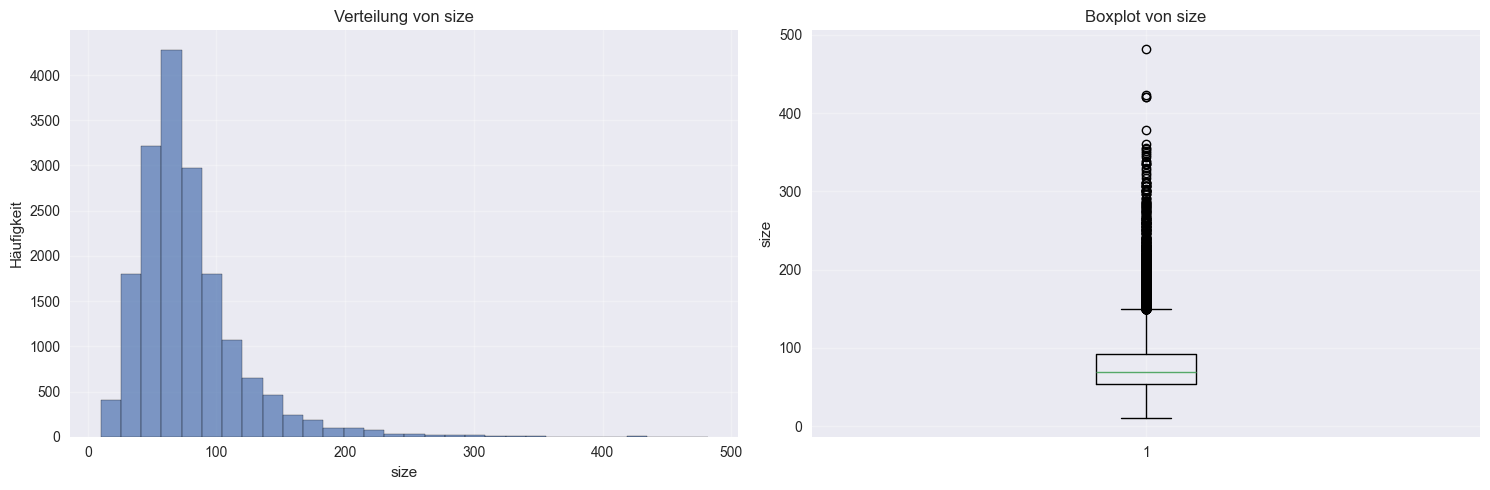


Analyse von price_per_sqm:
  Verfügbare Werte: 17487/17487 (100.0%)
  Statistik: Min=1.3, Max=84.5, Median=13.6


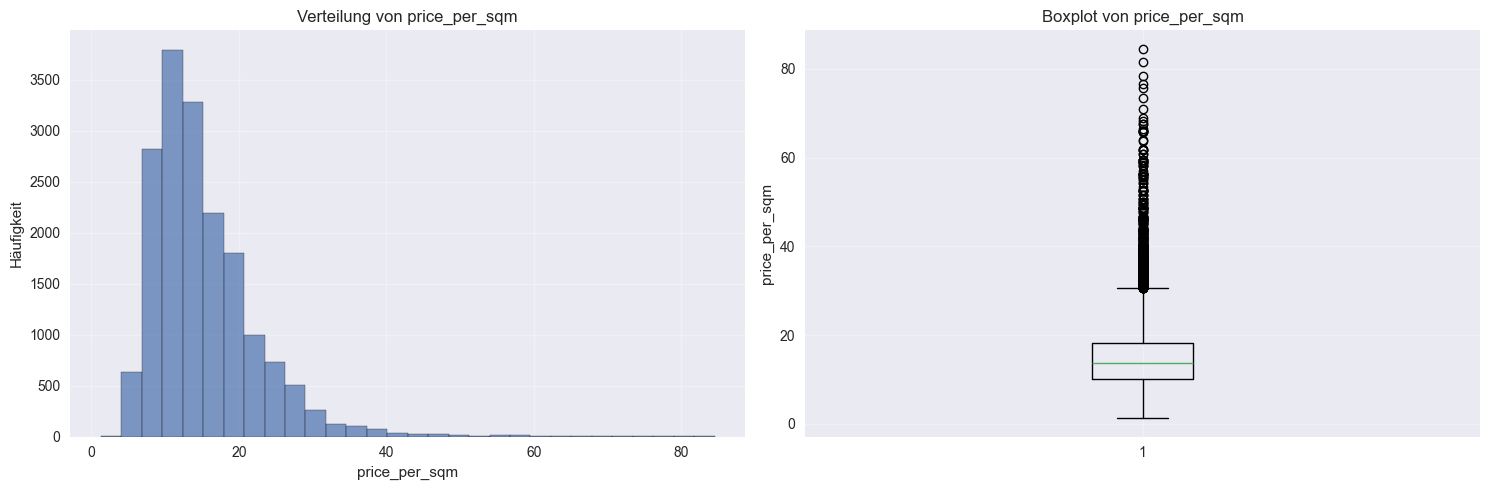


Durchschnittlicher price_per_sqm nach Bezirk:
  Falkensee: 21.33 €/m²
  Mitte: 20.49 €/m²
  Charlottenburg-Wilmersdorf: 19.92 €/m²
  Tiergarten: 19.44 €/m²
  Grunewald: 17.52 €/m²
  Prenzlauer: 17.50 €/m²
  Friedrichshain-Kreuzberg: 17.39 €/m²
  Friedrichshain: 17.31 €/m²
  Kreuzberg: 16.95 €/m²
  Wilmersdorf: 16.88 €/m²

KORRELATIONSANALYSE
Numerische Spalten für Korrelationsanalyse: ['price', 'size', 'rooms', 'year', 'plz', 'lat', 'lon', 'price_per_sqm']

Korrelationsmatrix:
               price   size  rooms   year    plz    lat    lon  price_per_sqm
price          1.000  0.786  0.645  0.059 -0.277 -0.042 -0.038          0.466
size           0.786  1.000  0.825 -0.100 -0.040 -0.040 -0.081         -0.056
rooms          0.645  0.825  1.000 -0.079  0.028 -0.024 -0.020         -0.070
year           0.059 -0.100 -0.079  1.000 -0.077  0.049  0.040          0.195
plz           -0.277 -0.040  0.028 -0.077  1.000  0.134 -0.323         -0.387
lat           -0.042 -0.040 -0.024  0.049  0.134 

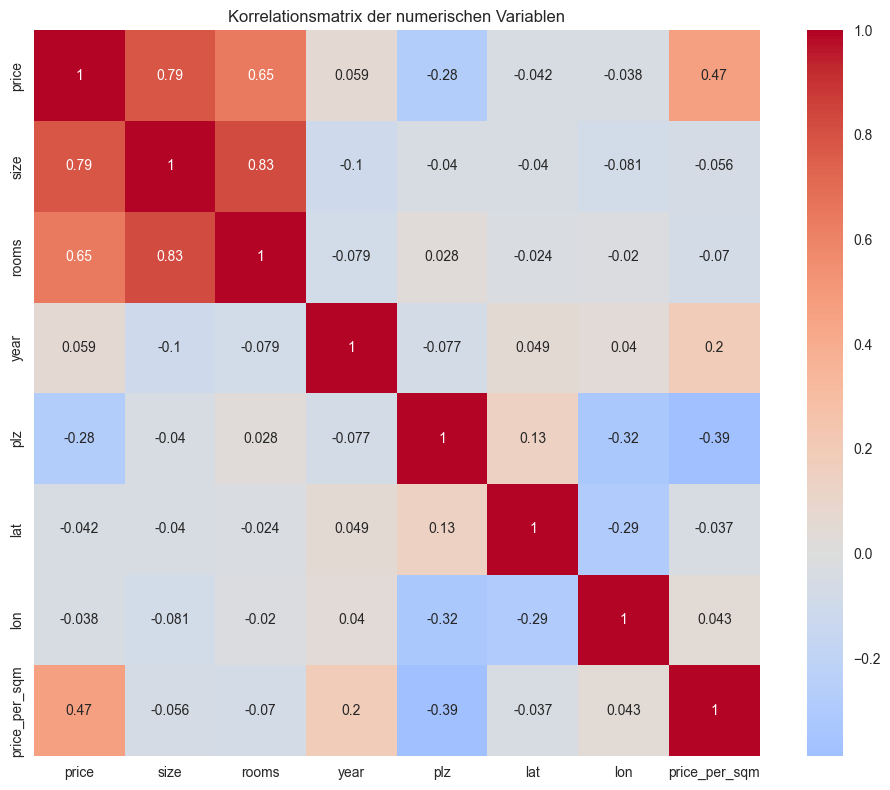


Starke Korrelationen (|r| > 0.5):
  price ↔ size: 0.786
  price ↔ rooms: 0.645
  size ↔ rooms: 0.825

ZUSAMMENFASSUNG DER WEITERFÜHRENDEN ANALYSE
📊 ZENTRALE ERKENNTNISSE:
   • Datensätze: 3 verschiedene Zeitpunkte
   • Bezirke: 87 verschiedene Bezirke
   • Zeitspanne: 2019 - 2025
   • Gesamtdatenpunkte: 17,487
   • Preisentwicklung: +150.52€ (+13.1%)
   • Durchschnittliche Wohnungsgröße: 77.5m²
   • Preisspanne: 150€ - 9990€
   • Durchschnittlicher m²-Preis: 15.19€/m²

✅ Weiterführende Analyse abgeschlossen!
🎯 Nächste Schritte: Präsentation der Ergebnisse und Handlungsempfehlungen


In [15]:
# Wohnungsgrößen und Preis-pro-Quadratmeter-Analyse
print("=" * 60)
print("WOHNUNGSGRÖSSENS- UND PREIS-PRO-QUADRATMETER-ANALYSE")
print("=" * 60)

# Verfügbare Spalten anzeigen
print("Verfügbare Spalten für Größenanalyse:")
size_columns = [col for col in combined_df.columns if 'size' in col.lower()]
price_sqm_columns = [col for col in combined_df.columns if 'price_per_sqm' in col.lower()]
print(f"Größen-relevante Spalten: {size_columns}")
print(f"Preis-pro-Quadratmeter Spalten: {price_sqm_columns}")

# Analyse der Wohnungsgrößen
for col in ['size', 'price_per_sqm']:
    if col in combined_df.columns:
        print(f"\nAnalyse von {col}:")
        
        # Vollständigkeit
        total_values = len(combined_df)
        non_null_values = combined_df[col].notna().sum()
        completeness = (non_null_values / total_values) * 100
        print(f"  Verfügbare Werte: {non_null_values}/{total_values} ({completeness:.1f}%)")
        
        # Grundlegende Statistiken
        if col == 'size':
            print(f"  Statistik: Min={combined_df[col].min()}, Max={combined_df[col].max()}, Median={combined_df[col].median()}")
        else:
            print(f"  Statistik: Min={combined_df[col].min():.1f}, Max={combined_df[col].max():.1f}, Median={combined_df[col].median():.1f}")
        
        # Visualisierung
        import matplotlib.pyplot as plt
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Histogramm
        ax1.hist(combined_df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        ax1.set_title(f'Verteilung von {col}')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Häufigkeit')
        ax1.grid(True, alpha=0.3)
        
        # Box-Plot
        ax2.boxplot(combined_df[col].dropna())
        ax2.set_title(f'Boxplot von {col}')
        ax2.set_ylabel(col)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Preis-pro-Quadratmeter nach Bezirk
        if col == 'price_per_sqm':
            print(f"\nDurchschnittlicher {col} nach Bezirk:")
            price_per_sqm_by_district = combined_df.groupby('district')[col].mean().sort_values(ascending=False)
            for district, price in price_per_sqm_by_district.head(10).items():
                print(f"  {district}: {price:.2f} €/m²")

print("\n" + "="*60)
print("KORRELATIONSANALYSE")
print("="*60)

# Korrelationsmatrix numerischer Variablen
numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
print(f"Numerische Spalten für Korrelationsanalyse: {list(numeric_columns)}")

if len(numeric_columns) > 1:
    correlation_matrix = combined_df[numeric_columns].corr()
    print("\nKorrelationsmatrix:")
    print(correlation_matrix.round(3))
    
    # Heatmap der Korrelationen
    import seaborn as sns
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Korrelationsmatrix der numerischen Variablen')
    plt.tight_layout()
    plt.show()
    
    # Starke Korrelationen hervorheben
    print("\nStarke Korrelationen (|r| > 0.5):")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                print(f"  {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

print("\n" + "="*60)
print("ZUSAMMENFASSUNG DER WEITERFÜHRENDEN ANALYSE")
print("="*60)

# Gesamtüberblick
print("📊 ZENTRALE ERKENNTNISSE:")
print(f"   • Datensätze: {combined_df['dataset_id'].nunique()} verschiedene Zeitpunkte")
print(f"   • Bezirke: {combined_df['district'].nunique()} verschiedene Bezirke")
print(f"   • Zeitspanne: {combined_df['year'].min()} - {combined_df['year'].max()}")
print(f"   • Gesamtdatenpunkte: {len(combined_df):,}")

# Preis-Trends
yearly_avg = combined_df.groupby('year')['price'].mean()
if len(yearly_avg) > 1:
    years = sorted(yearly_avg.index)
    total_change = yearly_avg[years[-1]] - yearly_avg[years[0]]
    total_change_pct = (total_change / yearly_avg[years[0]]) * 100
    print(f"   • Preisentwicklung: {total_change:+.2f}€ ({total_change_pct:+.1f}%)")

# Größenverteilung
size_stats = combined_df['size'].describe()
print(f"   • Durchschnittliche Wohnungsgröße: {size_stats['mean']:.1f}m²")
print(f"   • Preisspanne: {combined_df['price'].min():.0f}€ - {combined_df['price'].max():.0f}€")

if 'price_per_sqm' in combined_df.columns:
    sqm_stats = combined_df['price_per_sqm'].describe()
    print(f"   • Durchschnittlicher m²-Preis: {sqm_stats['mean']:.2f}€/m²")

print("\n✅ Weiterführende Analyse abgeschlossen!")
print("🎯 Nächste Schritte: Präsentation der Ergebnisse und Handlungsempfehlungen")